In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

In [3]:
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name='E Comm')

In [5]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.000,Mobile Phone,3,6.000,Debit Card,Female,3.000,3,Laptop & Accessory,2,Single,9,1,11.000,1.000,1.000,5.000,159.930
1,50002,1,NaN,Phone,1,8.000,UPI,Male,3.000,4,Mobile,3,Single,7,1,15.000,0.000,1.000,0.000,120.900
2,50003,1,NaN,Phone,1,30.000,Debit Card,Male,2.000,4,Mobile,3,Single,6,1,14.000,0.000,1.000,3.000,120.280
3,50004,1,0.000,Phone,3,15.000,Debit Card,Male,2.000,4,Laptop & Accessory,5,Single,8,0,23.000,0.000,1.000,3.000,134.070
4,50005,1,0.000,Phone,1,12.000,CC,Male,NaN,3,Mobile,5,Single,3,0,11.000,1.000,1.000,3.000,129.600


In [6]:
df.shape

(5630, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [9]:
df["DaySinceLastOrder"].fillna(df["DaySinceLastOrder"].median(), inplace=True)
df["OrderAmountHikeFromlastYear"].fillna(df["OrderAmountHikeFromlastYear"].median(), inplace=True)
df["Tenure"].fillna(df["Tenure"].median(), inplace=True)
df["OrderCount"].fillna(df["OrderCount"].median(), inplace=True)
df["CouponUsed"].fillna(df["CouponUsed"].median(), inplace=True)
df["HourSpendOnApp"].fillna(df["HourSpendOnApp"].median(), inplace=True)
df["WarehouseToHome"].fillna(df["WarehouseToHome"].median(), inplace=True)

In [10]:
# df.describe()

In [11]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [12]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [13]:
df.describe(include='O')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [14]:
cat_cols= ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Churn', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain']

In [60]:
len(cat_cols)

11

In [59]:
num_cols=['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder', 'CashbackAmount']

In [61]:
len(num_cols)

8

In [15]:
for col in cat_cols:
    print("Unique value count of column ", col," are : ")
    print(df[col].value_counts())
    print(" ==========================================")

Unique value count of column  PreferredLoginDevice  are : 
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
Unique value count of column  PreferredPaymentMode  are : 
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
Unique value count of column  Gender  are : 
Male      3384
Female    2246
Name: Gender, dtype: int64
Unique value count of column  PreferedOrderCat  are : 
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
Unique value count of column  MaritalStatus  are : 
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64
Unique value count of column  Churn  are : 
0    4682
1     948
Name:

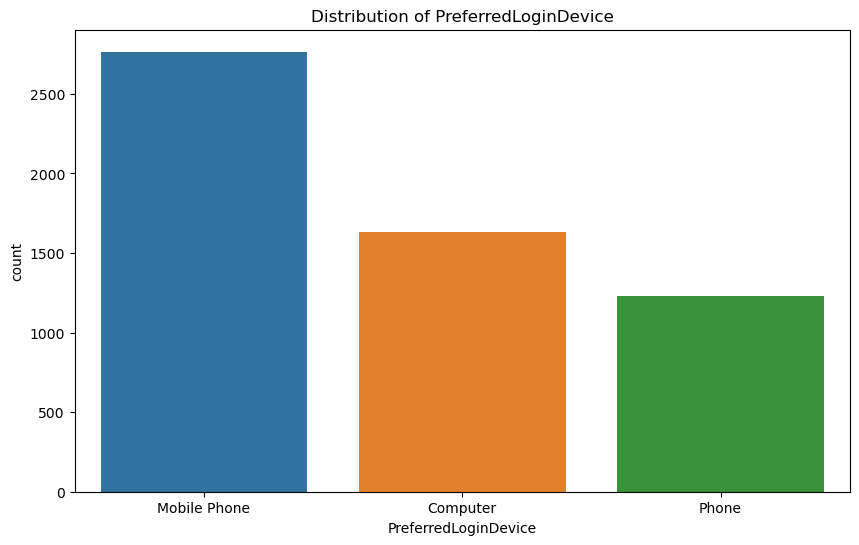

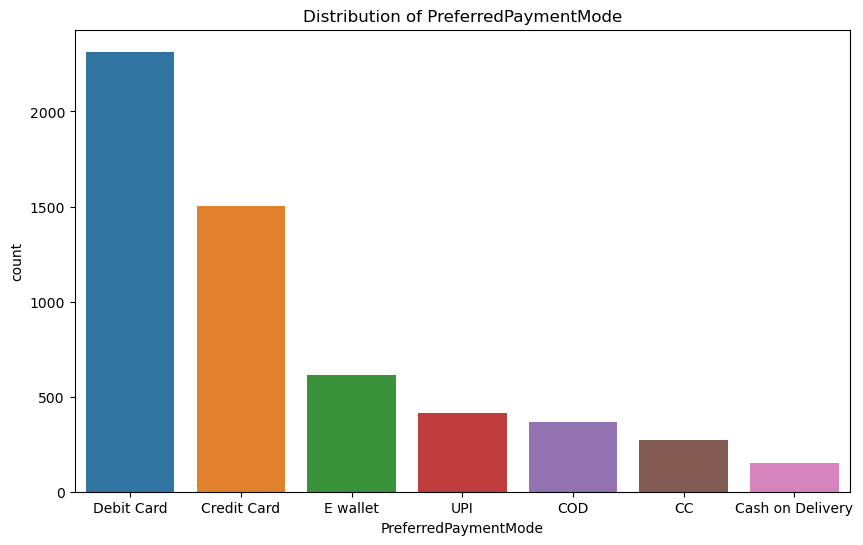

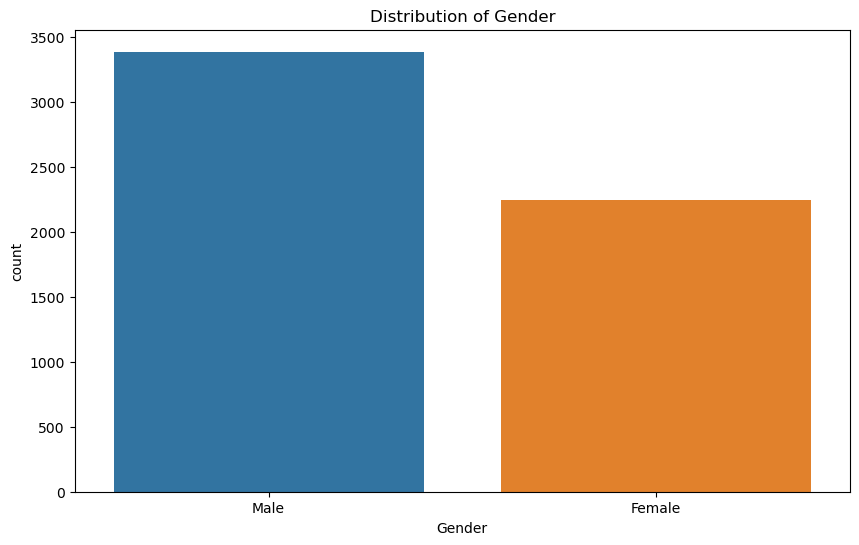

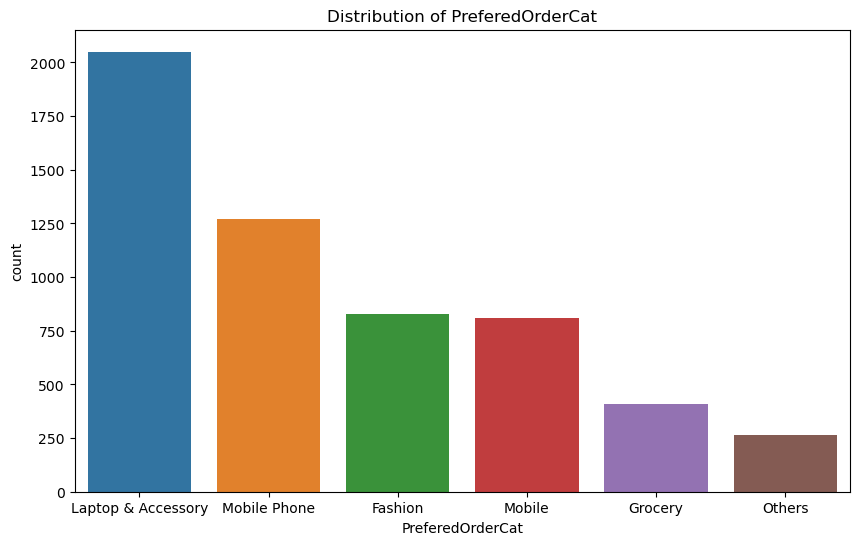

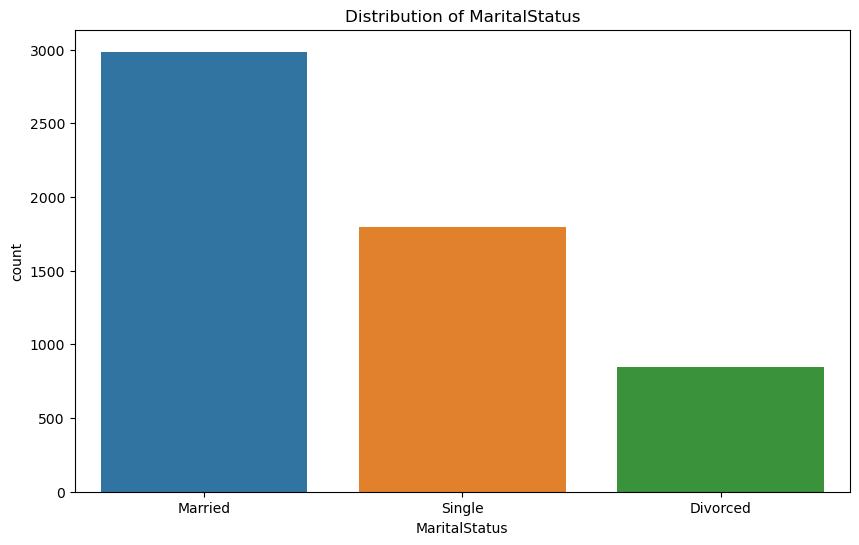

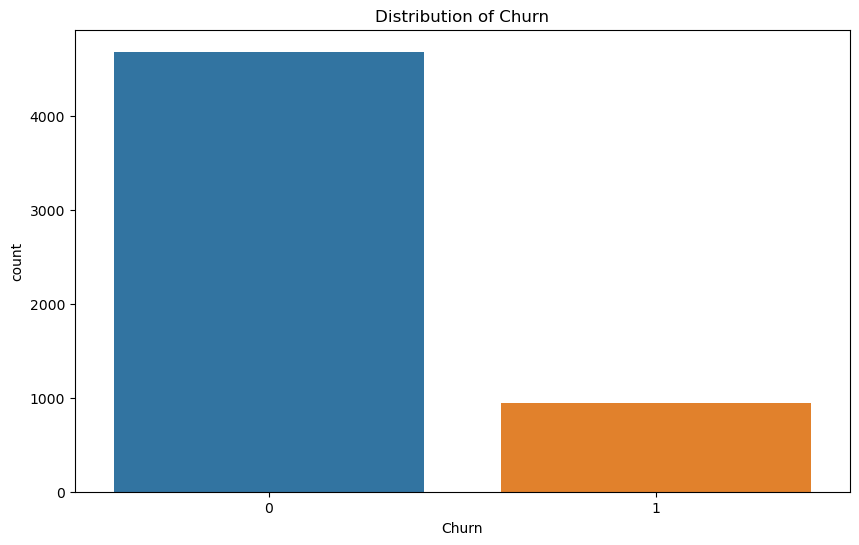

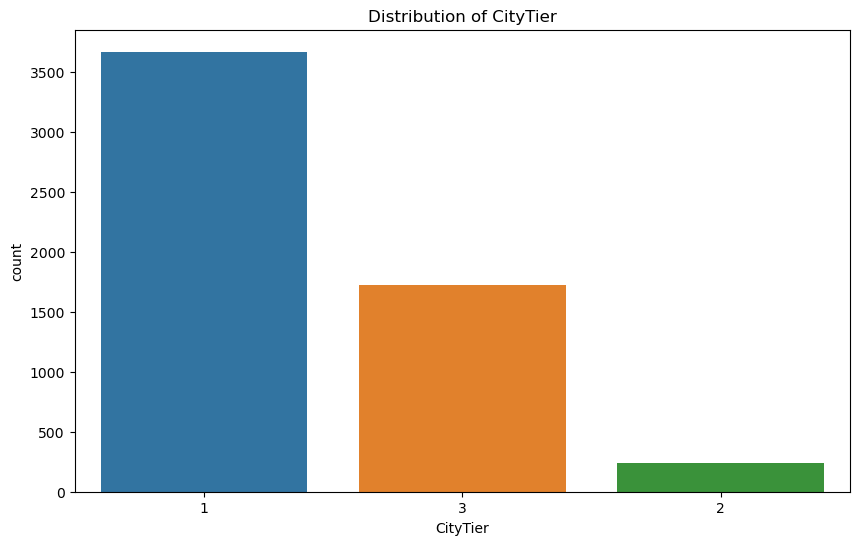

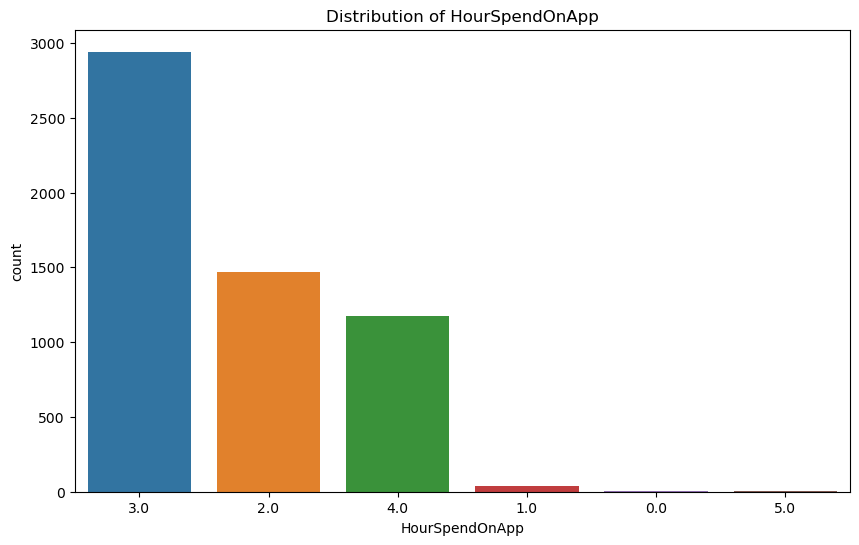

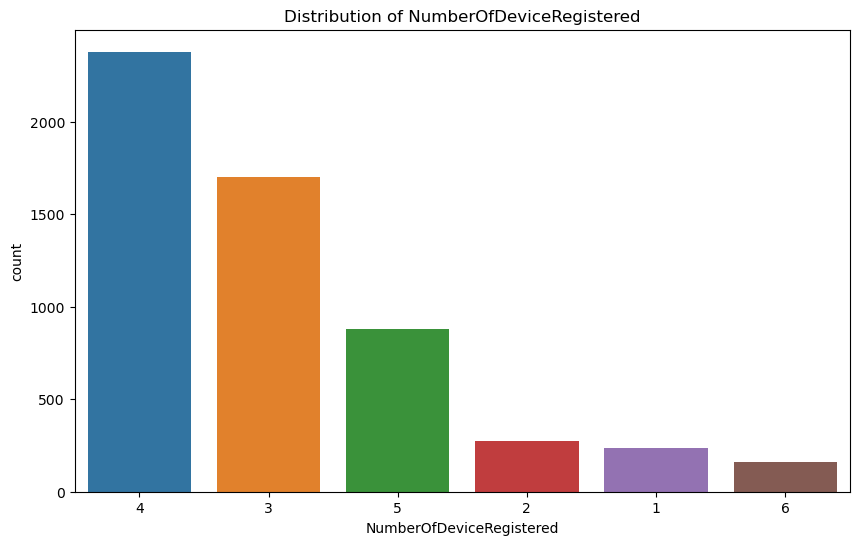

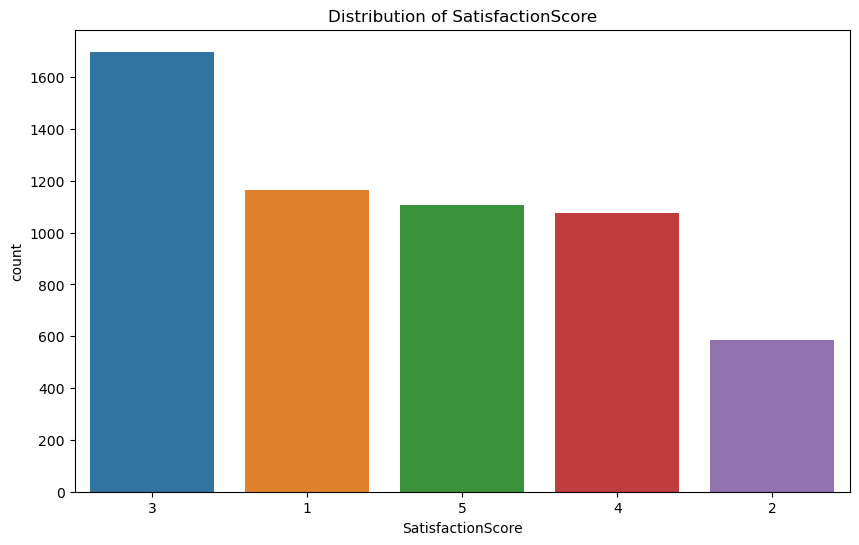

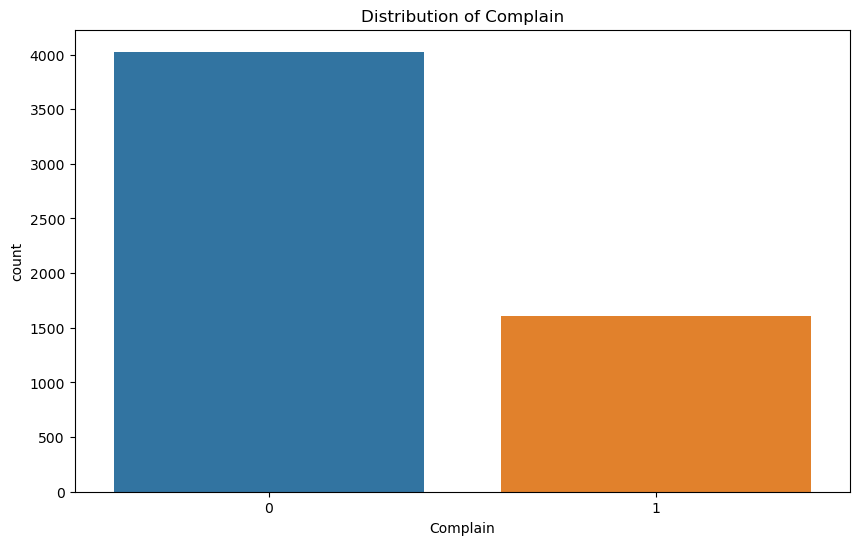

In [16]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

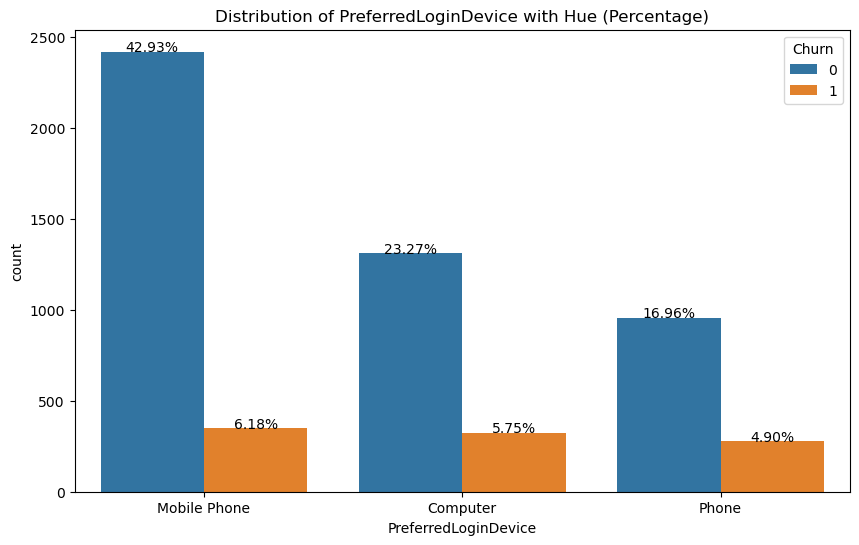

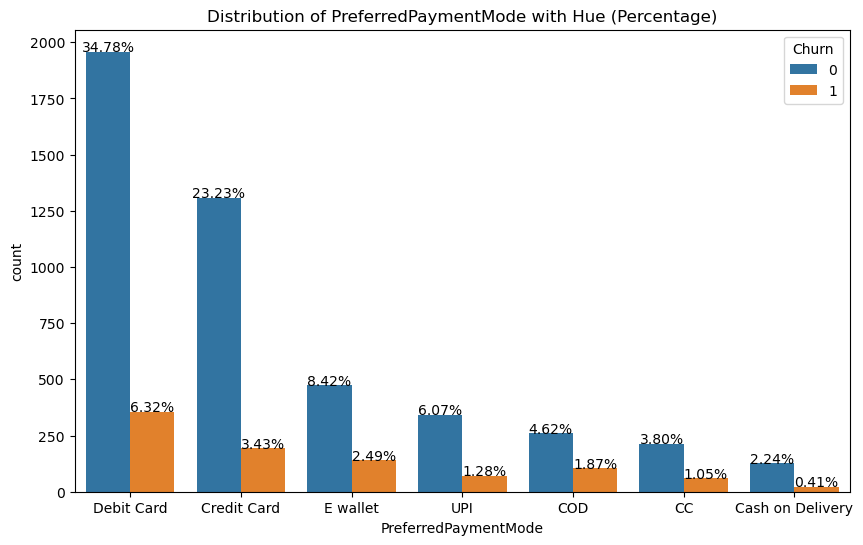

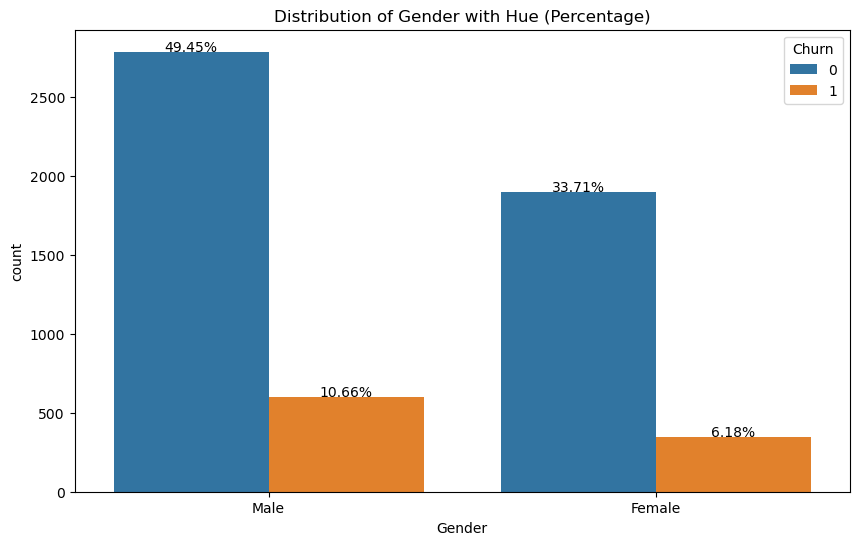

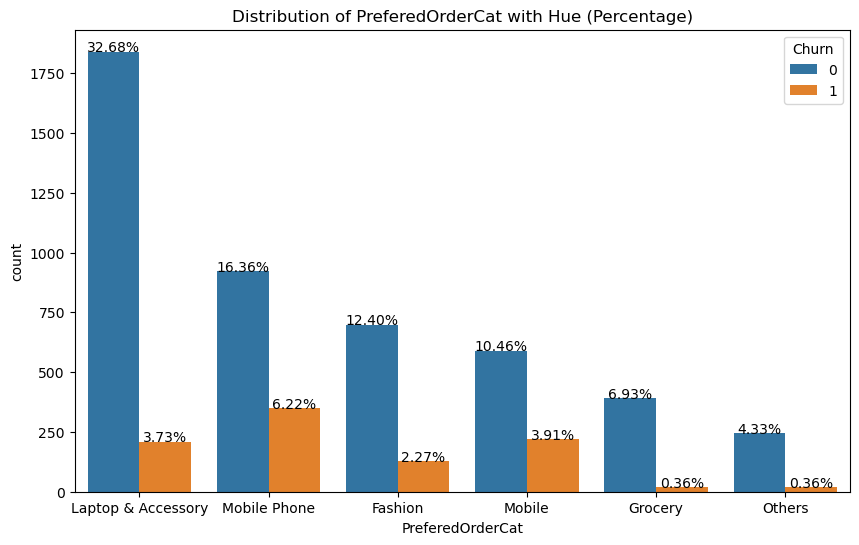

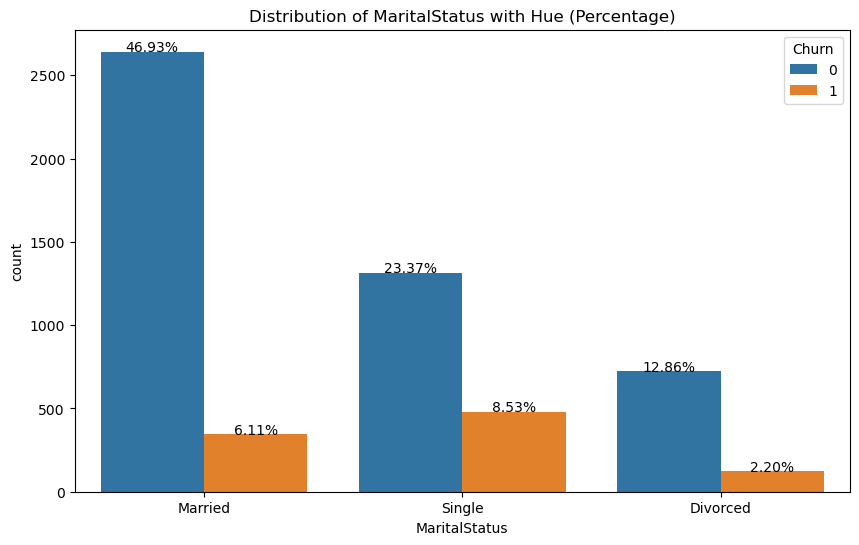

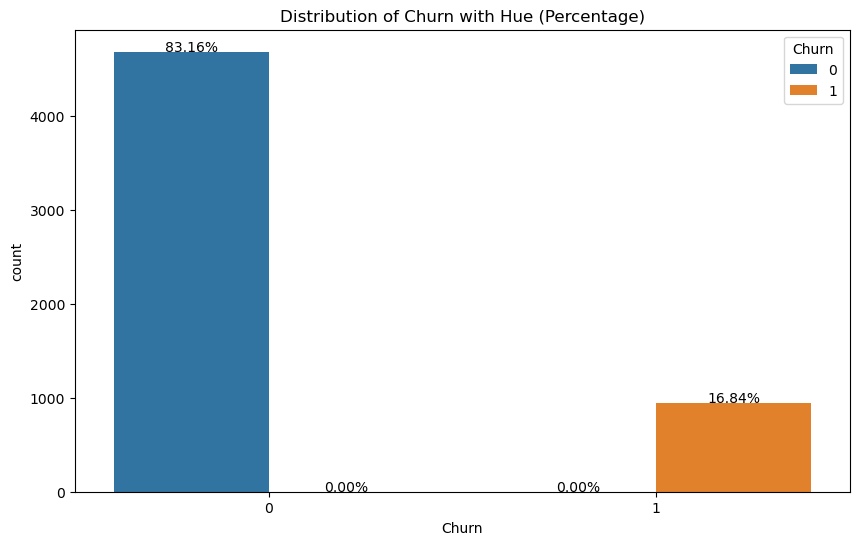

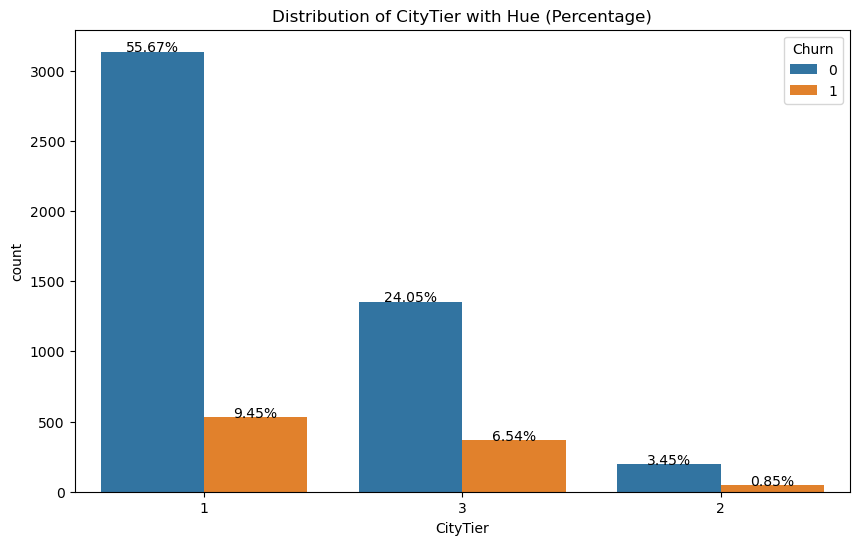

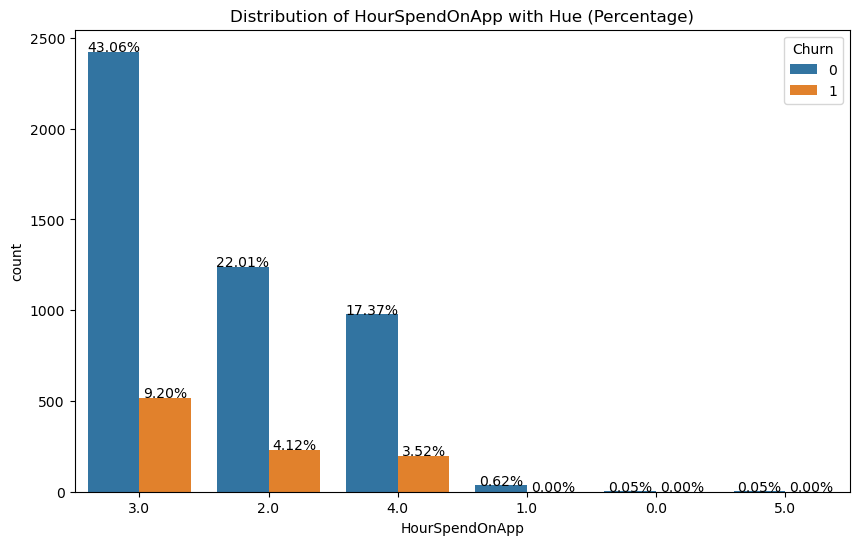

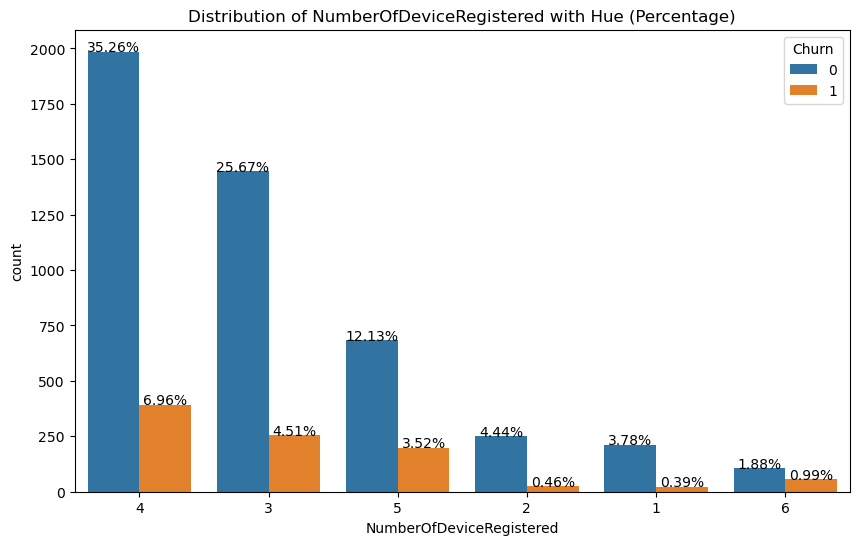

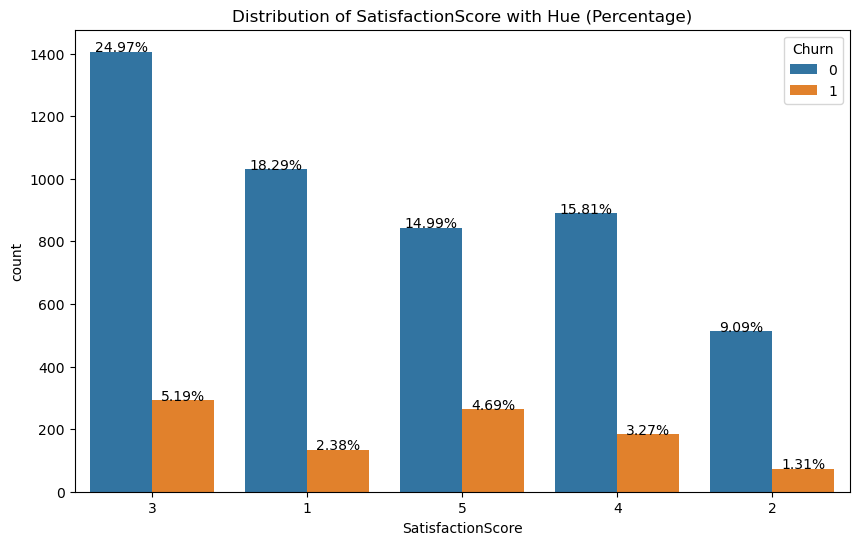

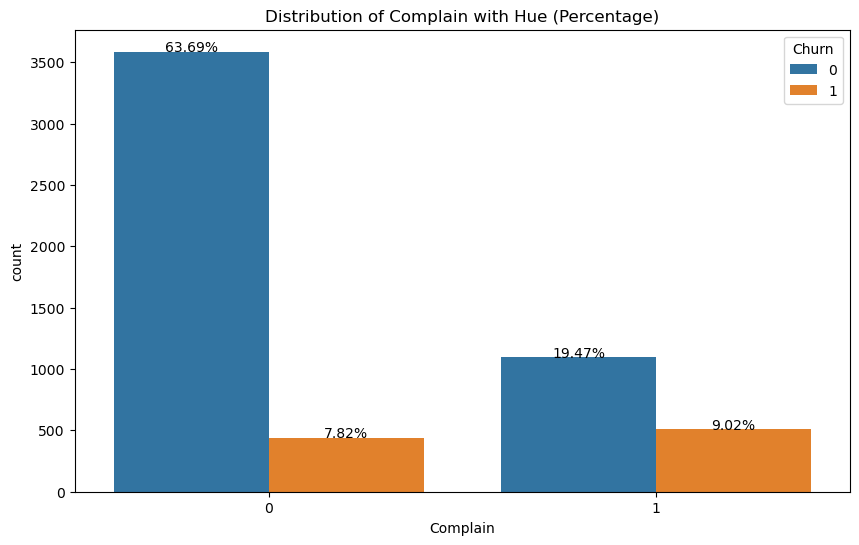

In [17]:
for column in cat_cols:
    plt.figure(figsize=(10, 6))
    
    # Calculate the percentage distribution
    total_count = df[column].count()
    percentages = df.groupby(['Churn', column]).size().unstack().div(total_count) * 100
    
    ax = sns.countplot(x=column, hue='Churn', data=df, order=df[column].value_counts().index)
    
    # Annotate the bars with percentages
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.2,
                '{:.2f}%'.format((height / total_count) * 100),
                ha="center")
    
    plt.title(f'Distribution of {column} with Hue (Percentage)')
    plt.show()

In [47]:
# total_count = df['PreferredLoginDevice'].value_counts(normalize=True)
# # sns.histplot(data =total_count,hue= 'Churn')
# # plt.show()

# for i in total_count.index:
# #     df['PreferredLoginDevice']==i
#     plt.plot(data=(df[df['PreferredLoginDevice']==i]))

In [46]:
for column in cat_cols:
    unique_values = df[column].unique()
    
    print(f"Churn Percentage for {column}:")
    for value in unique_values:
        churn_percentage = df[df[column] == value]['Churn'].mean() * 100
        print(f"{value}: {churn_percentage:.2f}%")
    
    print("\n")

Churn Percentage for PreferredLoginDevice:
Mobile Phone: 12.59%
Phone: 22.42%
Computer: 19.83%


Churn Percentage for PreferredPaymentMode:
Debit Card: 15.38%
UPI: 17.39%
CC: 21.61%
Cash on Delivery: 15.44%
E wallet: 22.80%
COD: 28.77%
Credit Card: 12.86%


Churn Percentage for Gender:
Female: 15.49%
Male: 17.73%


Churn Percentage for PreferedOrderCat:
Laptop & Accessory: 10.24%
Mobile: 27.19%
Mobile Phone: 27.54%
Others: 7.58%
Fashion: 15.50%
Grocery: 4.88%


Churn Percentage for MaritalStatus:
Single: 26.73%
Divorced: 14.62%
Married: 11.52%


Churn Percentage for Churn:
1: 100.00%
0: 0.00%


Churn Percentage for CityTier:
3: 21.37%
1: 14.51%
2: 19.83%


Churn Percentage for HourSpendOnApp:
3.0: 17.61%
2.0: 15.77%
1.0: 0.00%
0.0: 0.00%
4.0: 16.84%
5.0: 0.00%


Churn Percentage for NumberOfDeviceRegistered:
3: 14.95%
4: 16.49%
5: 22.47%
2: 9.42%
1: 9.36%
6: 34.57%


Churn Percentage for SatisfactionScore:
2: 12.63%
3: 17.20%
5: 23.83%
4: 17.13%
1: 11.51%


Churn Percentage for Complai

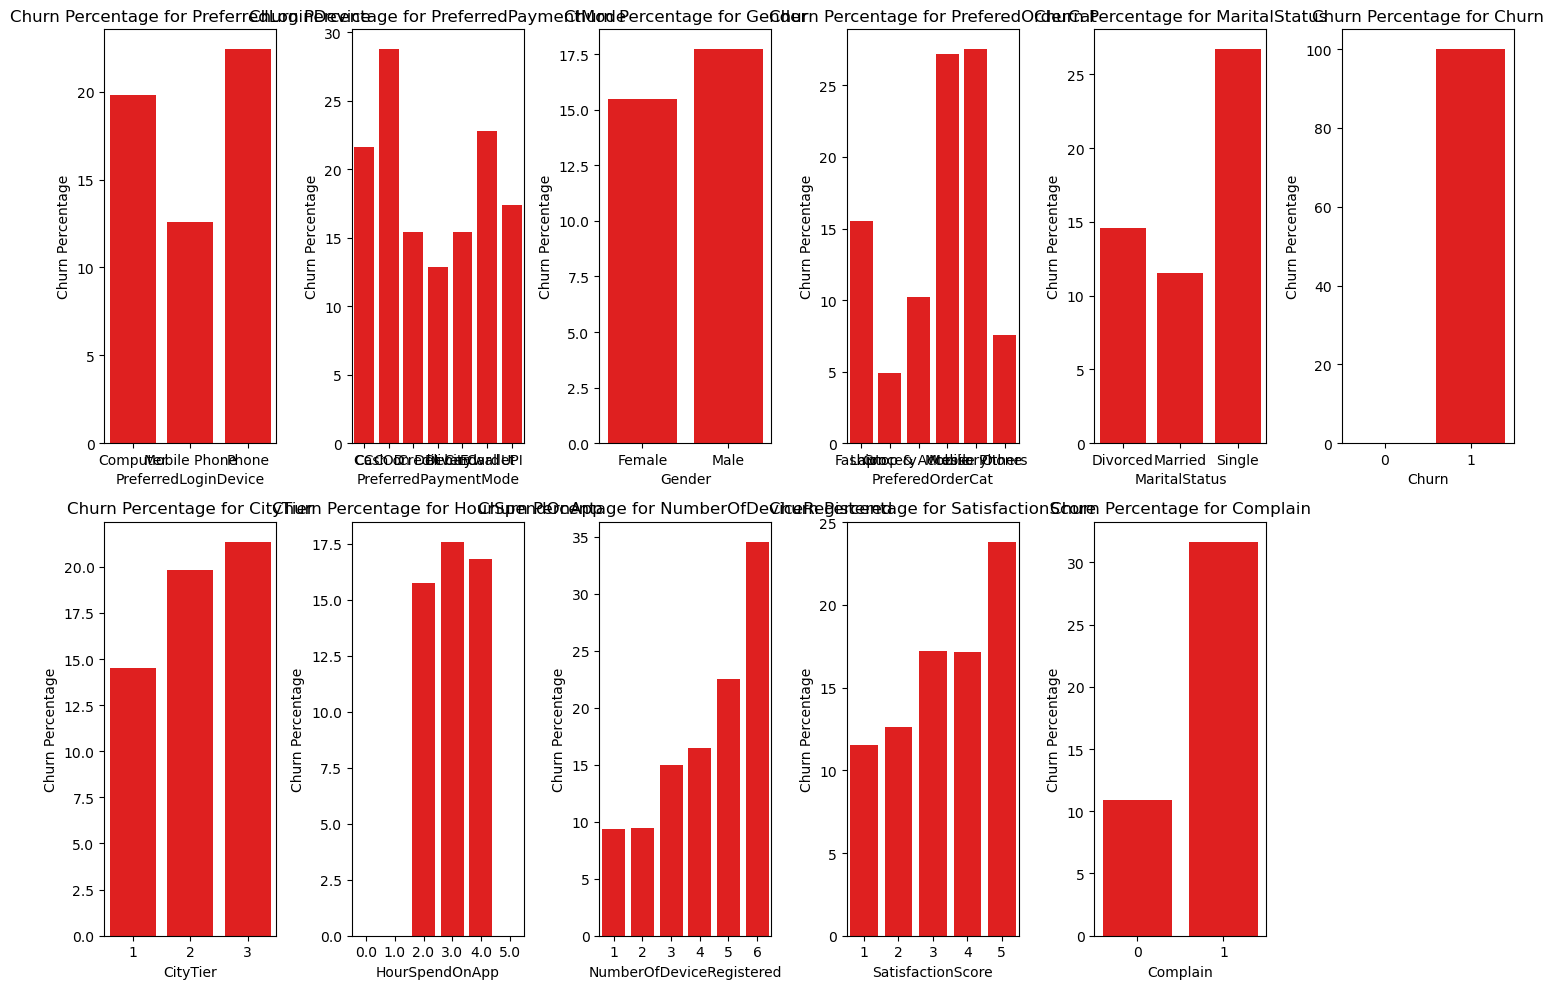

In [55]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(cat_cols, 1):
    plt.subplot(2, len(cat_cols)//2 + 1, i)
    
    # Calculate the percentage of churned customers for each unique value
    churn_percentages = df.groupby(column)['Churn'].mean() * 100
    
    # Plot the data
    sns.barplot(x=churn_percentages.index, y=churn_percentages.values, color='red')
    
    plt.title(f'Churn(%):{column}')
    plt.ylabel('Churn Percentage')
    plt.xlabel(column)
    plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [57]:
# plt.figure(figsize=(15, 10))
# for i, column in enumerate(cat_cols, 1):
#     plt.subplot(len(cat_cols), 1, i)
    
#     # Calculate the percentage of churned customers for each unique value
#     churn_percentages = df.groupby(column)['Churn'].mean() * 100
    
#     # Plot the data
#     bars = sns.barplot(x=churn_percentages.values, y=churn_percentages.index, color='red')
    
#     # Annotate bars with percentage values
#     for bar, percentage in zip(bars.patches, churn_percentages.values):
#         plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='left', va='center')
    
#     plt.title(f'Churn Percentage for {column}')
#     plt.xlabel('Churn Percentage')
#     plt.ylabel(column)
#     plt.xlim(0, 100)  # Set x-axis limit from 0 to 100 for percentage
    
# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()

In [68]:
churn_summary = df.groupby('Churn')[num_cols].describe().T
print(churn_summary)

Churn                                    0       1
Tenure                      count 4682.000 948.000
                            mean    11.405   3.860
                            std      8.267   5.477
                            min      0.000   0.000
                            25%      5.000   0.000
                            50%     10.000   1.000
                            75%     17.000   7.000
                            max     61.000  21.000
WarehouseToHome             count 4682.000 948.000
                            mean    15.306  16.857
                            std      8.334   8.288
                            min      5.000   5.000
                            25%      9.000  10.000
                            50%     14.000  14.000
                            75%     19.000  22.000
                            max    127.000  36.000
NumberOfAddress             count 4682.000 948.000
                            mean     4.163   4.466
                            std

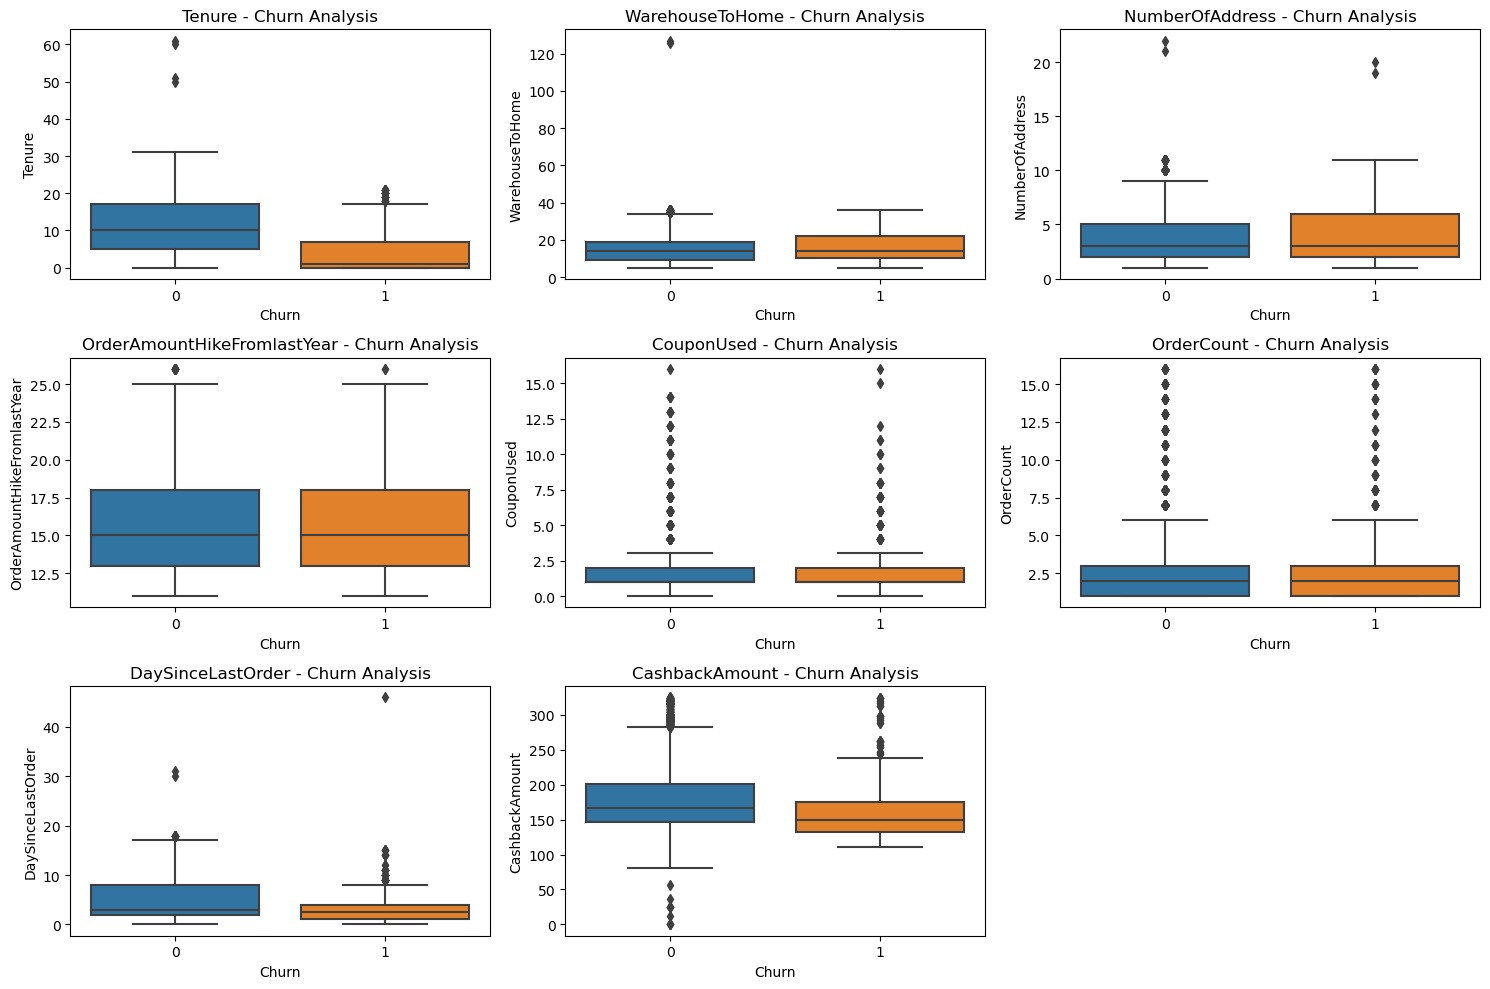

In [69]:
plt.figure(figsize=(15, 10))

# Create subplots for each numerical column
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    
    # Box plot for churned and not churned customers
    sns.boxplot(x='Churn', y=column, data=df)
    
    plt.title(f'{column} - Churn Analysis')
    plt.xlabel('Churn')
    plt.ylabel(column)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [71]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

# # Numerical columns for outlier removal
# num_cols = ['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
#             'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Remove outliers for each numerical column
for column in num_cols:
    df = remove_outliers_iqr(df, column)

# Display the modified DataFrame without outliers


In [72]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000,Mobile Phone,3,6.000,Debit Card,Female,3.000,3,Laptop & Accessory,2,Single,9,1,11.000,1.000,1.000,5.000,159.930
1,1,9.000,Phone,1,8.000,UPI,Male,3.000,4,Mobile,3,Single,7,1,15.000,0.000,1.000,0.000,120.900
2,1,9.000,Phone,1,30.000,Debit Card,Male,2.000,4,Mobile,3,Single,6,1,14.000,0.000,1.000,3.000,120.280
3,1,0.000,Phone,3,15.000,Debit Card,Male,2.000,4,Laptop & Accessory,5,Single,8,0,23.000,0.000,1.000,3.000,134.070
4,1,0.000,Phone,1,12.000,CC,Male,3.000,3,Mobile,5,Single,3,0,11.000,1.000,1.000,3.000,129.600


In [73]:
df.shape

(3455, 19)

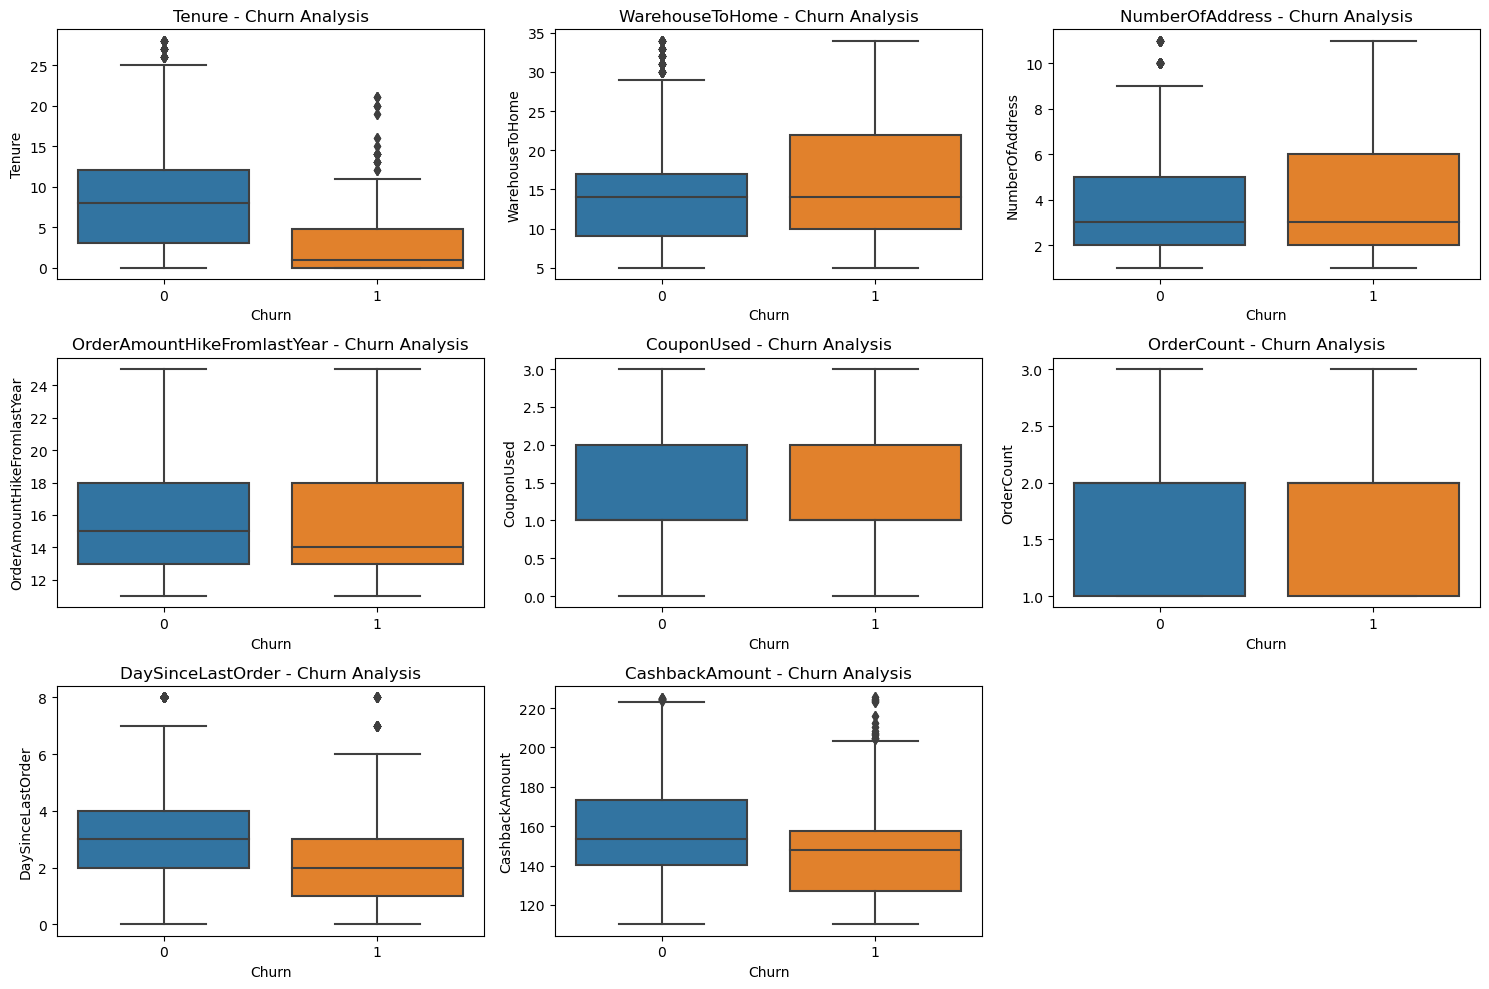

In [74]:
plt.figure(figsize=(15, 10))

# Create subplots for each numerical column
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    
    # Box plot for churned and not churned customers
    sns.boxplot(x='Churn', y=column, data=df)
    
    plt.title(f'{column} - Churn Analysis')
    plt.xlabel('Churn')
    plt.ylabel(column)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [75]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')